In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
x = [4, 5, 10, 4, 3, 11, 14, 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 21, 21,23]

In [3]:
data = list(zip(x,y))
print(data)

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 21), (10, 21), (12, 23)]


**Elbow method**

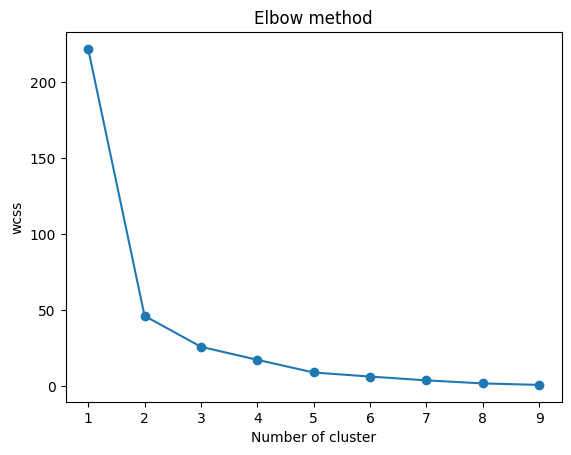

In [4]:
wcss = []
for i in range(1, 10):
  kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,10), wcss, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('wcss')
plt.show()

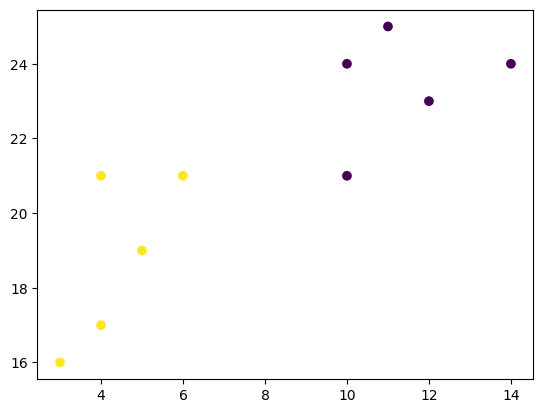

In [5]:
kmeans = KMeans(n_clusters=2, init = 'k-means++', max_iter=300, n_init=10, random_state =0)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

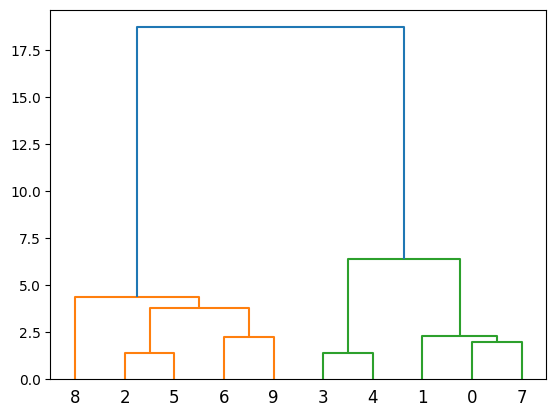

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(data, method = 'ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

**Silhouette method**

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Generate sample data
np.random.seed(0)
data = np.array([[1, 2], [5, 8], [1.5, 1.8], [8, 8], [1, 0.6], [9, 11], [7, 5], [2, 3], [1.1, 1.3], [9, 9], [1.5, 1.6], [9, 11]])


In [9]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(data)
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

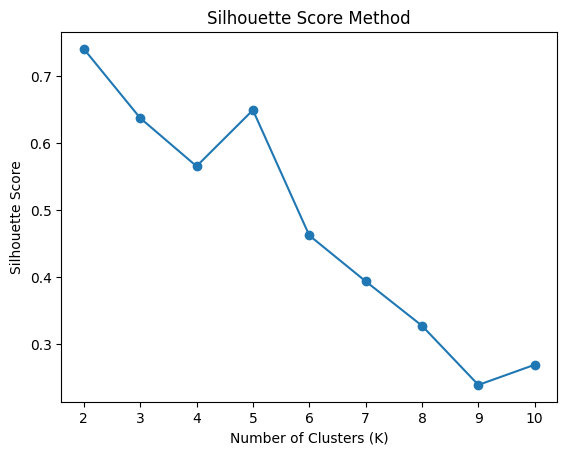

In [10]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

**Gap Statistics Method**

In [5]:
pip install gap-stat

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6133 sha256=37936f5281ac458a94d85751e6d21dd50e31823f2a4ed4bb17f48eb7405d5642
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap-stat


In [9]:
from gap_statistic import OptimalK
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

,0,1
2,-0.980578,-9.446603
0,-3.772056,-1.321797
0,-5.617029,-2.473330
3,-7.444640,-6.452423
1,1.869854,-4.512090


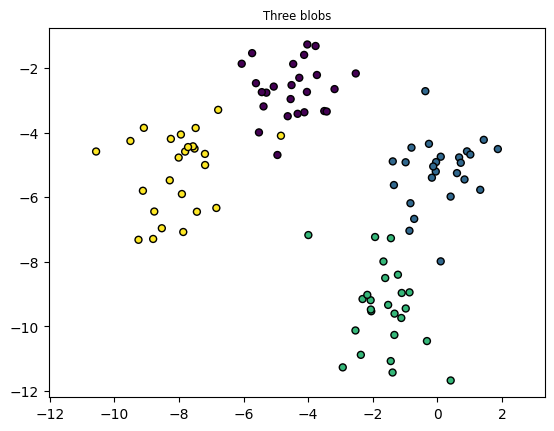

In [10]:
plt.title("Three blobs", fontsize='small')
X1, Y1 = make_blobs(n_features=2, centers=4) # centers is number of classes
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
s=25, edgecolor='k');
blob_df = pd.DataFrame(X1,Y1)
plt.axis('equal');
blob_df.head()

In [11]:
gs_obj = OptimalK(n_jobs=1, n_iter= 10)
n_clusters = gs_obj(X1, n_refs=50, cluster_array=np.arange(1, 15))
print('Optimal number of clusters: ', n_clusters)

Optimal number of clusters:  4


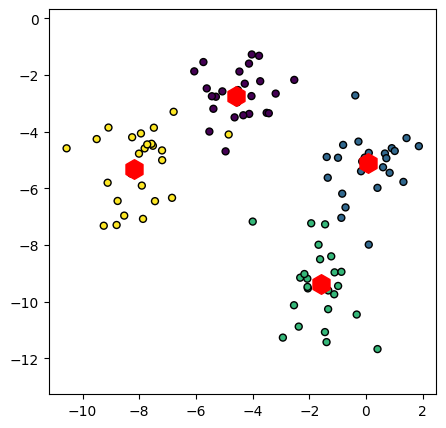

In [12]:
ms_kmeans = KMeans(n_clusters=n_clusters, init='random',\
n_init=3, random_state=109).fit(X1)
plt.figure(figsize=(5,5))
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
s=25, edgecolor='k');
plt.scatter(ms_kmeans.cluster_centers_[:,0],\
ms_kmeans.cluster_centers_[:,1], c='r', marker='h', s=200);
plt.axis('equal');

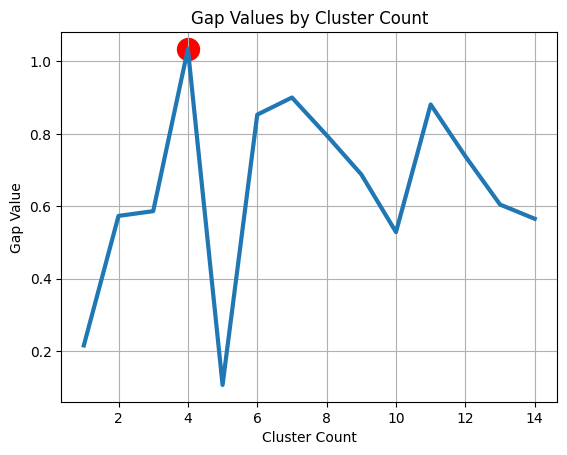

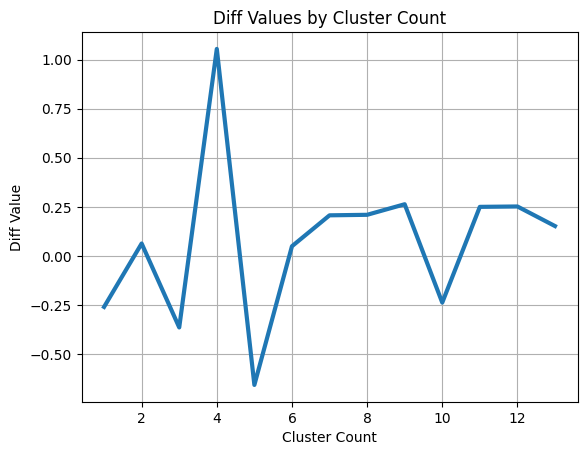

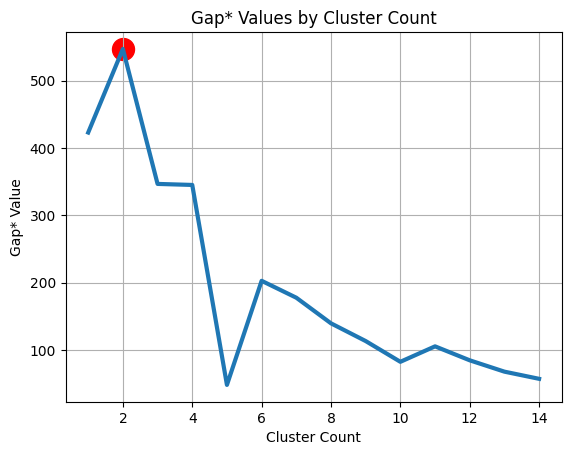

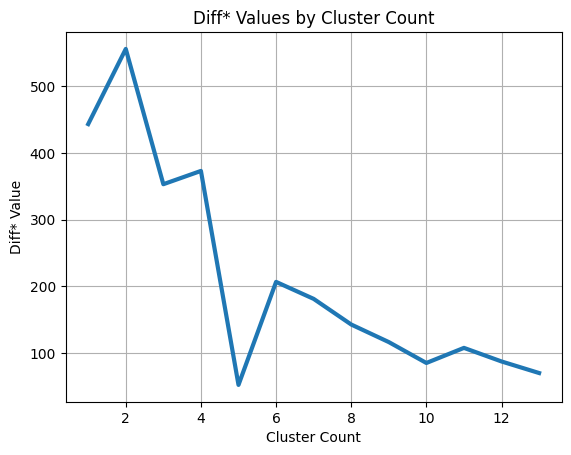

In [13]:
gs_obj.plot_results()

In [14]:
# show GAP and GAP* statistics
gs_obj.gap_df .iloc[:,:3]

,n_clusters,gap_value,ref_dispersion_std
0,1.0,0.215914,145.871076
1,2.0,0.573627,127.206660
2,3.0,0.586780,59.640985
3,4.0,1.034724,45.563547
4,5.0,0.106918,57.782042
5,6.0,0.853201,31.009978
6,7.0,0.900500,28.614375
7,8.0,0.796434,25.691085
8,9.0,0.688186,22.691947
9,10.0,0.528960,20.706270


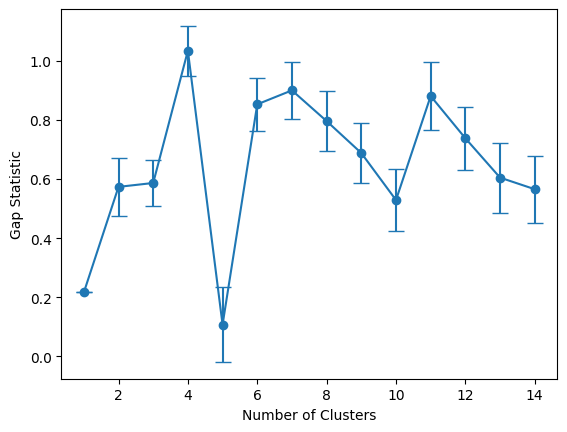

In [18]:
def display_gapstat_with_errbars(gap_df):
  gaps = gap_df["gap_value"].values
  diffs = gap_df["diff"]

  err_bars = np.zeros(len(gap_df))
  err_bars[1:] = diffs[:-1] - gaps[:-1] + gaps[1:]

  plt.scatter(gap_df["n_clusters"], gap_df["gap_value"])
  plt.errorbar(gap_df["n_clusters"], gap_df["gap_value"], yerr=err_bars, capsize=6)
  plt.xlabel("Number of Clusters")
  plt.ylabel("Gap Statistic")
  plt.show()

display_gapstat_with_errbars(gs_obj.gap_df)